In [64]:
# Group 1

# Craig Perkins
# Sneha Sharma Satheesha
# Pranay Bindela

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib
from sklearn.impute import KNNImputer
import numpy as np

In [42]:
df = pd.read_csv('../data/massachusetts-history.csv')

In [7]:
df

           date state    death  deathConfirmed  deathIncrease  deathProbable  \
0    2021-03-07    MA  16417.0         16085.0             43          332.0   
1    2021-03-06    MA  16374.0         16044.0             52          330.0   
2    2021-03-05    MA  16322.0         15992.0             26          330.0   
3    2021-03-04    MA  16296.0         15967.0             44          329.0   
4    2021-03-03    MA  16252.0         15925.0             70          327.0   
..          ...   ...      ...             ...            ...            ...   
406  2020-01-26    MA      NaN             NaN              0            NaN   
407  2020-01-25    MA      NaN             NaN              0            NaN   
408  2020-01-24    MA      NaN             NaN              0            NaN   
409  2020-01-23    MA      NaN             NaN              0            NaN   
410  2020-01-22    MA      NaN             NaN              0            NaN   

     hospitalized  hospitalizedCumulati

In [9]:
df.head(10)

         date state    death  deathConfirmed  deathIncrease  deathProbable  \
0  2021-03-07    MA  16417.0         16085.0             43          332.0   
1  2021-03-06    MA  16374.0         16044.0             52          330.0   
2  2021-03-05    MA  16322.0         15992.0             26          330.0   
3  2021-03-04    MA  16296.0         15967.0             44          329.0   
4  2021-03-03    MA  16252.0         15925.0             70          327.0   
5  2021-03-02    MA  16182.0         15859.0             38          323.0   
6  2021-03-01    MA  16144.0         15822.0             26          322.0   
7  2021-02-28    MA  16118.0         15796.0             51          322.0   
8  2021-02-27    MA  16067.0         15744.0             43          323.0   
9  2021-02-26    MA  16024.0         15703.0             46          321.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0       19713.0                 19713.0                  665.0   
1       1

In [43]:
columns_to_drop = [
    'state',
    'hospitalized',
    'inIcuCumulative',
    'negativeTestsAntibody',
    'negativeTestsPeopleAntibody',
    'negativeTestViral',
    'onVentilatorCumulative',
    'positiveScore',
    'positiveTestsAntibody',
    'positiveTestsAntigen',
    'positiveTestsPeopleAntigen',
    'totalTestEncountersViral',
    'totalTestEncountersViralIncrease',
    'totalTestsAntibody',
    'totalTestsAntigen',
    'totalTestsViral',
    'totalTestsViralIncrease'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [12]:
df.sample(5).T

                                      93          275         213         13   \
date                           2020-12-04  2020-06-05  2020-08-06  2021-02-22   
death                             10910.0      7235.0      8691.0     15853.0   
deathConfirmed                    10674.0      7097.0      8470.0     15534.0   
deathIncrease                          36          34          32          27   
deathProbable                       236.0       138.0       221.0       319.0   
hospitalizedCumulative            14397.0     10303.0     12007.0     19176.0   
hospitalizedCurrently              1394.0      1533.0       403.0       888.0   
hospitalizedIncrease                    0          65          14           0   
inIcuCurrently                      278.0       350.0        73.0       229.0   
negative                        3207957.0    532212.0   1151344.0   4292030.0   
negativeIncrease                    21018        9340       11393        7086   
negativeTestsViral          

In [13]:
df.describe(include='all')

              date         death  deathConfirmed  deathIncrease  \
count          411    355.000000      309.000000     411.000000   
unique         411           NaN             NaN            NaN   
top     2021-03-07           NaN             NaN            NaN   
freq             1           NaN             NaN            NaN   
mean           NaN   9001.850704     9939.190939      39.944039   
std            NaN   4018.084799     2770.754902      42.868879   
min            NaN      2.000000     4004.000000     -41.000000   
25%            NaN   7635.500000     8213.000000      11.000000   
50%            NaN   9180.000000     9295.000000      26.000000   
75%            NaN  11121.000000    11465.000000      55.000000   
max            NaN  16417.000000    16085.000000     252.000000   

        deathProbable  hospitalizedCumulative  hospitalizedCurrently  \
count      280.000000              352.000000             338.000000   
unique            NaN                     NaN      

In [44]:
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

Text(0, 0.5, 'Date')

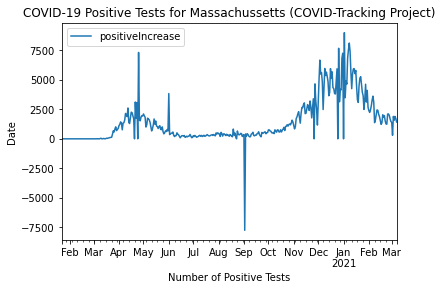

In [15]:
lines = df.plot.line(x='date', y='positiveIncrease', title='COVID-19 Positive Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Positive Tests")
lines.set_ylabel("Date")

In [45]:
# Remote the bad datapoint(s)

rows_with_negative = df[df['positiveIncrease'] < 0]

In [46]:
df.loc[df['positiveIncrease'] < 0, ['positiveIncrease']] = 0

Text(0, 0.5, 'Date')

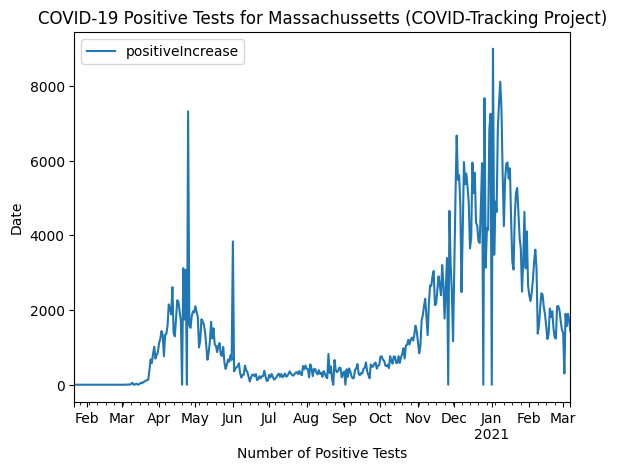

In [25]:
lines = df.plot.line(x='date', y='positiveIncrease', title='COVID-19 Positive Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Positive Tests")
lines.set_ylabel("Date")


Text(0, 0.5, 'Date')

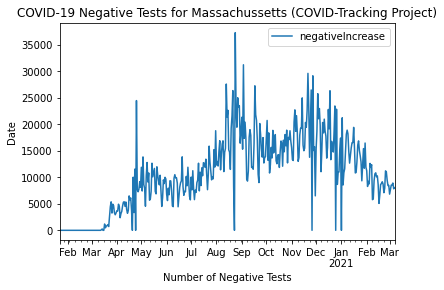

In [47]:
df.loc[df['negativeIncrease'] < 0, ['negativeIncrease']] = 0
lines = df.plot.line(x='date', y='negativeIncrease', title='COVID-19 Negative Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Negative Tests")
lines.set_ylabel("Date")

In [48]:
df = df.drop(columns=['negativeTestsViral'])
df = df.drop(columns=['positiveTestsPeopleAntibody'])

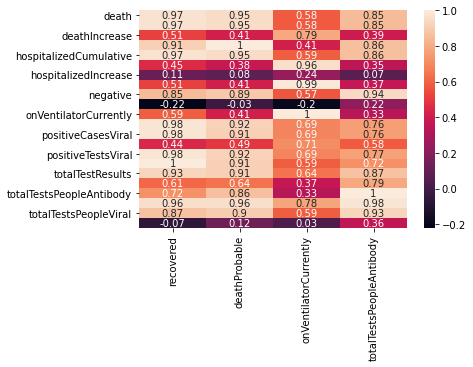

<Figure size 720x792 with 0 Axes>

In [49]:
matrix = df.corr().round(2)
x=matrix[['recovered','deathProbable','onVentilatorCurrently','totalTestsPeopleAntibody']]
sns.heatmap(x, annot=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(11)
plt.show()

In [50]:
imputer=KNNImputer(n_neighbors=5)
df['totalTestsPeopleAntigen']=imputer.fit_transform(df[['totalTestsPeopleAntigen']])
df['recovered_imputed']=imputer.fit_transform(df[['recovered']])
df['deathProbable']=imputer.fit_transform(df[['deathProbable']])
df['onVentilatorCurrently']=imputer.fit_transform(df[['onVentilatorCurrently']])
df['totalTestsPeopleAntibody']=imputer.fit_transform(df[['totalTestsPeopleAntibody']])
df

          date    death  deathConfirmed  deathIncrease  deathProbable  \
0   2021-03-07  16417.0         16085.0             43         332.00   
1   2021-03-06  16374.0         16044.0             52         330.00   
2   2021-03-05  16322.0         15992.0             26         330.00   
3   2021-03-04  16296.0         15967.0             44         329.00   
4   2021-03-03  16252.0         15925.0             70         327.00   
..         ...      ...             ...            ...            ...   
406 2020-01-26      NaN             NaN              0         235.75   
407 2020-01-25      NaN             NaN              0         235.75   
408 2020-01-24      NaN             NaN              0         235.75   
409 2020-01-23      NaN             NaN              0         235.75   
410 2020-01-22      NaN             NaN              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  66

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='death'>

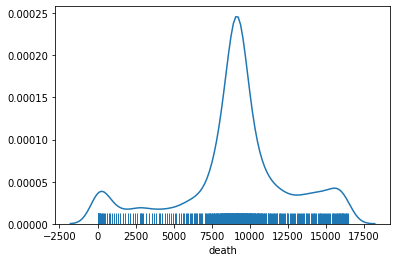

In [71]:
sns.distplot(df['death'], hist=False, rug=True)

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='deathIncrease'>

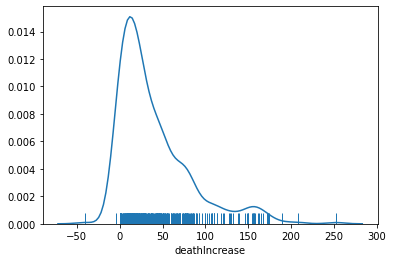

In [72]:
sns.distplot(df['deathIncrease'], hist=False, rug=True)

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='deathConfirmed'>

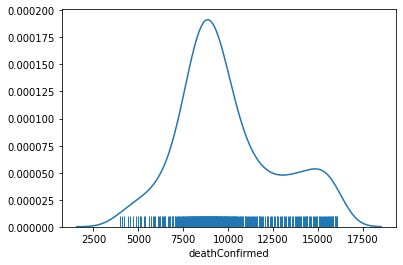

In [75]:
sns.distplot(df['deathConfirmed'], hist=False, rug=True)

In [85]:
df['death'].fillna(df['death'].median(),inplace=True)
df['deathIncrease'].fillna(method ='pad',inplace=True)
df['deathConfirmed'].fillna(method ='pad',inplace=True)
df['hospitalizedCumulative'].fillna(method ='pad',inplace=True)
df['hospitalizedCurrently'].fillna(method ='pad',inplace=True)
df['inIcuCurrently'].fillna(method ='pad',inplace=True)
df['negative'].fillna(method ='pad',inplace=True)
df['positive'].fillna(method ='pad',inplace=True)
df['positiveCasesViral'].fillna(method ='pad',inplace=True)
df['totalTestsPeopleViral'].fillna(method ='pad',inplace=True)

In [96]:
import calendar
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day'] = df['day'].astype('string')
df['month']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [98]:
df.describe()

              death  deathConfirmed  deathIncrease  deathProbable  \
count    411.000000      411.000000     411.000000     411.000000   
mean    9026.124088     8466.223844      39.944039     235.750000   
std     3734.110091     3515.098040      42.868879      34.667357   
min        2.000000     4004.000000     -41.000000     136.000000   
25%     8057.000000     4047.000000      11.000000     220.000000   
50%     9180.000000     8582.000000      26.000000     235.750000   
75%    10577.500000    10345.500000      55.000000     235.750000   
max    16417.000000    16085.000000     252.000000     332.000000   

       hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
count              411.000000             411.000000            411.000000   
mean             10399.087591            1323.457421             47.963504   
std               5983.966843             912.864906            102.890333   
min                 61.000000             290.000000            -9

In [106]:
df['deathDecrease']=df['deathIncrease'][df['deathIncrease']<0]
df[['deathDecrease']] = df[['deathDecrease']].fillna(0)
df['hospitalizedDecreased']=df['hospitalizedIncrease'][df['hospitalizedIncrease']<0]
df[['hospitalizedDecreased']] = df[['hospitalizedDecreased']].fillna(0)
import pandas as pd; import numpy as np
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')
df

          date    death  deathConfirmed  deathIncrease  deathProbable  \
0   2021-03-07  16417.0         16085.0             43         332.00   
1   2021-03-06  16374.0         16044.0             52         330.00   
2   2021-03-05  16322.0         15992.0             26         330.00   
3   2021-03-04  16296.0         15967.0             44         329.00   
4   2021-03-03  16252.0         15925.0             70         327.00   
..         ...      ...             ...            ...            ...   
406 2020-01-26   9180.0          4004.0              0         235.75   
407 2020-01-25   9180.0          4004.0              0         235.75   
408 2020-01-24   9180.0          4004.0              0         235.75   
409 2020-01-23   9180.0          4004.0              0         235.75   
410 2020-01-22   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  66

In [109]:
from fastai.tabular.core import add_datepart

In [110]:
df_1 = df.copy()

In [114]:
df_1 = add_datepart(df_1, 'date')

In [115]:
df_1

       death  deathConfirmed  deathIncrease  deathProbable  \
0    16417.0         16085.0             43         332.00   
1    16374.0         16044.0             52         330.00   
2    16322.0         15992.0             26         330.00   
3    16296.0         15967.0             44         329.00   
4    16252.0         15925.0             70         327.00   
..       ...             ...            ...            ...   
406   9180.0          4004.0              0         235.75   
407   9180.0          4004.0              0         235.75   
408   9180.0          4004.0              0         235.75   
409   9180.0          4004.0              0         235.75   
410   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  665.0                     0   
1                   19713.0                  687.0                     0   
2                   19713.0

In [112]:
import pandas as pd; import numpy as np
df_1['Year'] = df_1['Year'].astype('category')
df_1['month'] = df_1['month'].astype('category')
df_1['year'] = df_1['year'].astype('category')
df_1

       death  deathConfirmed  deathIncrease  deathProbable  \
0    16417.0         16085.0             43         332.00   
1    16374.0         16044.0             52         330.00   
2    16322.0         15992.0             26         330.00   
3    16296.0         15967.0             44         329.00   
4    16252.0         15925.0             70         327.00   
..       ...             ...            ...            ...   
406   9180.0          4004.0              0         235.75   
407   9180.0          4004.0              0         235.75   
408   9180.0          4004.0              0         235.75   
409   9180.0          4004.0              0         235.75   
410   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  665.0                     0   
1                   19713.0                  687.0                     0   
2                   19713.0

<AxesSubplot:xlabel='Year', ylabel='positive'>

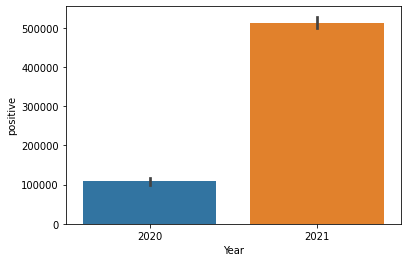

In [116]:
sns.barplot(x = 'Year',
            y = 'positive',
            data = df_1)

In [124]:
import plotly.express as px
fig = px.histogram(df_1, x='month', y='positive',title='Positive cases Every Month',color='Year',facet_row='Dayofweek',width=1000, height=1000)
fig

In [126]:
fig = px.histogram(df_1, x='month', y='death',title='Deaths Every Month',color='Year',facet_row='Dayofweek',width=1000, height=1000)
fig

In [140]:
df_f=df_1.copy()

In [142]:
df_f['Date']=df['date']

In [146]:
df_f.index=pd.to_datetime(df_f['Date'],format='%Y-%m-%d')
del df_f['Date']
df_f = df_f.reset_index()
df_f

              death  deathConfirmed  deathIncrease  deathProbable  \
Date                                                                
2021-03-07  16417.0         16085.0             43         332.00   
2021-03-06  16374.0         16044.0             52         330.00   
2021-03-05  16322.0         15992.0             26         330.00   
2021-03-04  16296.0         15967.0             44         329.00   
2021-03-03  16252.0         15925.0             70         327.00   
...             ...             ...            ...            ...   
2020-01-26   9180.0          4004.0              0         235.75   
2020-01-25   9180.0          4004.0              0         235.75   
2020-01-24   9180.0          4004.0              0         235.75   
2020-01-23   9180.0          4004.0              0         235.75   
2020-01-22   9180.0          4004.0              0         235.75   

            hospitalizedCumulative  hospitalizedCurrently  \
Date                                     

In [150]:
train = df_f[df_f.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test = df_f[df_f.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

In [158]:
import pandas as pd; import numpy as np
train = train.reset_index()
train

              death  deathConfirmed  deathIncrease  deathProbable  \
Date                                                                
2020-12-31  12423.0         12157.0             85         266.00   
2020-12-30  12338.0         12076.0            120         262.00   
2020-12-29  12218.0         11958.0             60         260.00   
2020-12-28  12158.0         11900.0             48         258.00   
2020-12-27  12110.0         11852.0            100         258.00   
...             ...             ...            ...            ...   
2020-01-26   9180.0          4004.0              0         235.75   
2020-01-25   9180.0          4004.0              0         235.75   
2020-01-24   9180.0          4004.0              0         235.75   
2020-01-23   9180.0          4004.0              0         235.75   
2020-01-22   9180.0          4004.0              0         235.75   

            hospitalizedCumulative  hospitalizedCurrently  \
Date                                     

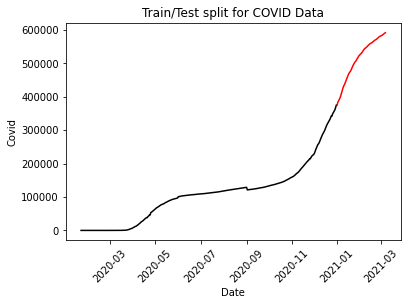

In [160]:
# plt.plot(df_f.index, df_f['positiveIncrease'], )
plt.plot(train.positive, color = "black")
plt.plot(test.positive, color = "red")
plt.ylabel('Covid')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for COVID Data")
plt.show()

In [161]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [163]:
y = train['positive']

In [164]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [165]:
ARMAmodel = ARMAmodel.fit()

In [179]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index


In [ ]:
y_pred_out = y_pred_df["Predictions"] + train.positive[-1]

In [181]:
 train.positive[-1]

2.0

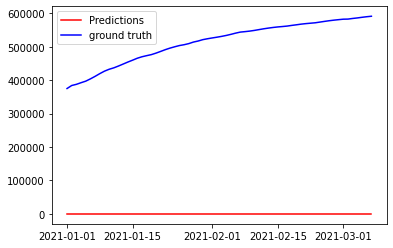

In [180]:
plt.plot(y_pred_out, color='red', label = 'Predictions')
plt.plot(test.positive, color = 'blue', label = 'ground truth')
plt.legend()

In [187]:
#cols=["Year","Month","Day"]
#df_1['date'] = df_1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_f1=df_f.copy()
#df_f1 = df_f1.set_index(df_f1['date'])
df_f1 = df_f1.sort_index()

train_1 = df_f1['2020-01-10':'2021-01-01']
test_1  = df_f1['2021-01-01':]

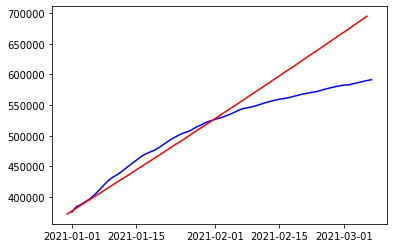

In [192]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_1['positive'], order = (1, 1, 1), seasonal_order = (1,1,1,12))
results=model.fit()
yhat = results.predict(start = 344, end = 409, dynamic = True)


# Plotting

import matplotlib.pyplot as plt
plt.plot(test_1['positive'], color = 'blue')
plt.plot(yhat, color = 'red')

In [193]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(test_1.positive, yhat, squared=False))
print(rmse)

205.03676936636725
